# Homework 2 - Classification

In this exercise you will use scikit-learn, a popular machine learning package in python to train and tune a classifier. A particularly useful feature is that all classifiers (and linear models) are called using the same API, so it is easy to test between different models (see the sklearn-intro notebook for examples). In this exercise, we will three classification techniques (logistic regression, decision trees, and random forest) that are representative of methods and challenges you will encounter when using any classification method.


## Dataset
The dataset you will be using is "Income". 

There are two data files: "income.csv" and "income_Xtest.csv"<br/>
Both files have the following fields, except income which is not available in "income_Xtest.csv"

Features:

1. age: continuous.<br>
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.<br>
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
5. education-num: continuous.<br>
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
10. sex: Female, Male.<br>
11. capital-gain: continuous.<br>
12. capital-loss: continuous.<br>
13. hours-per-week: continuous.<br>
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>

Target: 

income: whether a person makes over 50K a year.


Training dataset, "income.csv", contains 3706 rows and 15 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "income_Xtest.csv", contains 1000 rows and 14 columns. This is the test set which only contains the features.<br/>

Prediction task is to determine whether a person makes over 50K a year. (If you transfrom the target as binary values, please make sure >50 is 1, <=50 is 0)

In [5]:
import numpy as np
import pandas as pd


In [6]:
# Load your training data set and test data
df_train = pd.read_csv('income.csv')
df_test = pd.read_csv('income_Xtest.csv')

# convert income column to binary indicator (1 --> >50K, 0 --> <=50K)
df_train['income'] = df_train['income'].map({' <=50K': 0, ' >50K': 1})

# Clean the dataset: remove the rows with " ?"
for col in df_train.columns:
    df_train = df_train[df_train[col] != ' ?']
df_train.reset_index(drop = True, inplace = True)
df_train


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,31,Private,162572,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,0
1,42,Private,113770,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,0
2,36,Self-emp-not-inc,27053,HS-grad,9,Separated,Other-service,Unmarried,White,Female,0,0,40,United-States,0
3,52,Private,25826,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,47,United-States,1
4,42,Private,106900,Assoc-voc,11,Never-married,Tech-support,Not-in-family,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,44,Private,85604,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,1
3407,44,Local-gov,107845,Assoc-acdm,12,Divorced,Protective-serv,Not-in-family,White,Female,0,0,56,United-States,1
3408,48,State-gov,120131,HS-grad,9,Divorced,Craft-repair,Own-child,White,Male,8614,0,40,United-States,1
3409,49,Private,40000,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,4064,0,44,United-States,0


In [7]:
# cleaning test data
for col in df_test.columns:
    df_test = df_test[df_test[col] != ' ?']
df_test.reset_index(drop = True, inplace = True)
df_test


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,37,Private,149898,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
1,44,Private,292985,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,60,United-States
2,57,Private,50223,Some-college,10,Divorced,Handlers-cleaners,Other-relative,White,Male,0,0,25,United-States
3,29,Local-gov,400074,Some-college,10,Married-civ-spouse,Exec-managerial,Own-child,White,Female,0,0,40,United-States
4,55,Private,197399,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,37,Private,486194,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,50,Guatemala
922,21,Private,112225,Some-college,10,Never-married,Exec-managerial,Own-child,Asian-Pac-Islander,Male,0,0,15,United-States
923,49,Private,164200,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
924,39,Local-gov,52401,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States


In [4]:
# Split data into X and y
X = df_train.drop(columns = ['income'])
y = df_train['income']

X_test = df_test


### Standardization and One-hot Encoding

Standardize the continuous features and convert categorical variables into dummy variables

Standardization:

In [5]:
from sklearn.preprocessing import StandardScaler

# initialize scaler object
scaler = StandardScaler()
# columns we want to standardize
col_names = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# fit and apply transformation
scaler = StandardScaler().fit(X[col_names].values)
X[col_names] = scaler.transform(X[col_names].values)

# apply same transformation to test set for consistency
X_test[col_names] = scaler.transform(X_test[col_names].values)


In [6]:
# display
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.471588,Private,-0.269636,Bachelors,1.268390,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.123479,-0.191138,-0.008782,United-States
1,0.359645,Private,-0.722019,HS-grad,-0.356121,Married-civ-spouse,Adm-clerical,Wife,White,Female,-0.123479,-0.191138,-0.008782,United-States
2,-0.093755,Self-emp-not-inc,-1.525864,HS-grad,-0.356121,Separated,Other-service,Unmarried,White,Female,-0.123479,-0.191138,-0.008782,United-States
3,1.115312,Private,-1.537238,10th,-1.574504,Married-civ-spouse,Craft-repair,Husband,White,Male,-0.123479,5.235000,0.578602,United-States
4,0.359645,Private,-0.785702,Assoc-voc,0.456135,Never-married,Tech-support,Not-in-family,White,Male,-0.123479,-0.191138,-0.008782,United-States


In [7]:
# display
X_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.018188,Private,-0.387121,11th,-1.168376,Married-civ-spouse,Craft-repair,Husband,White,Male,-0.123479,-0.191138,-0.008782,United-States
1,0.510778,Private,0.939260,Some-college,0.050007,Divorced,Craft-repair,Not-in-family,White,Male,-0.123479,-0.191138,1.669460,United-States
2,1.493145,Private,-1.311084,Some-college,0.050007,Divorced,Handlers-cleaners,Other-relative,White,Male,-0.123479,-0.191138,-1.267464,United-States
3,-0.622722,Local-gov,1.931949,Some-college,0.050007,Married-civ-spouse,Exec-managerial,Own-child,White,Female,-0.123479,-0.191138,-0.008782,United-States
4,1.342012,Private,0.053201,HS-grad,-0.356121,Married-civ-spouse,Craft-repair,Husband,White,Male,-0.123479,-0.191138,0.830339,United-States


One-hot encoding:

In [8]:
len(X) # so we will re-split at 3411 after one-hot encoding

3411

In [9]:
# concatenate training and testing sets to one-hot encode
X_conc = pd.concat([X, X_test])

# one-hot encoding
cols_encode = ['workclass', 'education','marital-status', 'occupation', 
               'relationship', 'race', 'sex', 'native-country']
X_conc = pd.get_dummies(X_conc, drop_first = True)

# resplitting into training and validation set:
X = X_conc.iloc[:3411]
X_test = X_conc[3411:]
X


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,-0.471588,-0.269636,1.268390,-0.123479,-0.191138,-0.008782,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.359645,-0.722019,-0.356121,-0.123479,-0.191138,-0.008782,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.093755,-1.525864,-0.356121,-0.123479,-0.191138,-0.008782,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1.115312,-1.537238,-1.574504,-0.123479,5.235000,0.578602,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.359645,-0.785702,0.456135,-0.123479,-0.191138,-0.008782,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,0.510778,-0.983111,-0.356121,-0.123479,-0.191138,-0.008782,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3407,0.510778,-0.776942,0.862262,-0.123479,-0.191138,1.333811,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3408,0.813045,-0.663054,-0.356121,2.404718,-0.191138,-0.008782,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3409,0.888612,-1.405849,1.268390,1.069299,-0.191138,0.326866,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Splitting training data into training and validation set (the code has been provided)

In [10]:
X_train = X.iloc[:2800,:]
y_train = y.iloc[:2800]
X_val = X.iloc[2800:,:]
y_val = y.iloc[2800:]

# convert from series to numpy array for comparison with model output
y_val = np.array(y_val)


Print the shape of your X_train, X_val, X_test

In [11]:
print(f'X_train shape: {X_train.shape}')

X_train shape: (2800, 94)


In [12]:
print(f'X_val shape: {X_val.shape}')

X_val shape: (611, 94)


In [13]:
print(f'X_test shape: {X_test.shape}')

X_test shape: (926, 94)


## Logistic Regression

As previously mentioned, the scikit-learn classification API makes it easy to train a classifier. 


Use LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [14]:
from sklearn.linear_model import LogisticRegression
# First, initialize the classifier with default parameters
lr = LogisticRegression()
# then fit the classifier on training data and labels
lr.fit(X_train, y_train)


LogisticRegression()

In [15]:
# predict the output for validation dataset
lr_pred = lr.predict(X_val)


Implement precision(), recall(), accuracy() by yourselves

In [16]:
def precision(y, y_preds):
    """
    Return precision, which is TP/(TP+FP)
    """
    tp, fp = 0, 0
    size = len(y) # or len(y_pred)
    
    for idx in range(size):
        label_true, label_pred = y[idx], y_preds[idx]
        
        if label_true == 1 and label_pred == 1:
            tp += 1
            
        elif label_true == 0 and label_pred == 1:
            fp += 1
            
    precision = tp / (tp + fp)
    return precision

def recall(y, y_preds):
    """
    Return recall, which is TP/(TP+FN)
    """
    tp, fn = 0, 0
    size = len(y) # or len(y_pred)
    
    for idx in range(size):
        label_true, label_pred = y[idx], y_preds[idx]
        
        if label_true == 1 and label_pred == 1:
            tp += 1
            
        elif label_true == 1 and label_pred == 0:
            fn += 1
            
    recall = tp / (tp + fn)
    return recall

def accuracy(y, y_preds):
    """
    Return accuracy, which is (TP+TN)/(TP+FP+FN+TN)
    """
    tp, tn = 0, 0
    fp, fn = 0, 0
    size = len(y) # or len(y_pred)
    
    for idx in range(size):
        label_true, label_pred = y[idx], y_preds[idx]
        
        if label_true == 1 and label_pred == 1:
            tp += 1
            
        elif label_true == 0 and label_pred == 0:
            tn += 1
            
        elif label_true == 0 and label_pred == 1:
            fp += 1
            
        elif label_true == 1 and label_pred == 0:
            fn += 1
            
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    return accuracy


Use your above functions to print precision, recall, and accuracy of your model:

In [17]:
# Using the predictions to calculate accuracy, precision, recall
print(f'Accuracy: {accuracy(y_val, lr_pred)}')
print(f'Precision: {precision(y_val, lr_pred)}')
print(f'Recall: {recall(y_val, lr_pred)}')


Accuracy: 0.7594108019639935
Precision: 0.8297872340425532
Recall: 0.21910112359550563


Q1. Accuracy<br>
Ans - The accuracy is 0.7594108019639935.

Q2. Precision<br>
Ans - The precision is 0.8297872340425532.

Q3. Recall<br>
Ans - The recall is 0.21910112359550563.

Q4. Which metric (accuracy, precision, recall) is more appropriate and in what cases? Will there be scenarios where it is better to use precision than accuracy? Explain. <br>
Ans - Accuracy is a good metric to use when the costs of false positives and false negatives are similar and we have a balanced dataset with similar numbers of false positives and false negatives. Precision takes into account only the cases that are predicted to be positive, it can be useful in the case when the cost of a false positive is high (e.g. fraud detection). Recall counts how many of the actual positives our model captures through labeling them as positive, so it is a good metric to use when there is a high cost associated with a false negative (e.g. disease detection).

In general, it is better to use precison over accuracy when the cost of a false positive is high (e.g. fraud detection).

Q5. Which metric is suitable in this case? <br>
Ans - In this case, since the cost of a false negative or a false positive is not notably different, I think accuracy is most suitable.

### ROC curve

Use roc_curve from sklearn.metrics and use matplotlib.pyplot to plot the ROC curve. Use validation set to make predictions.

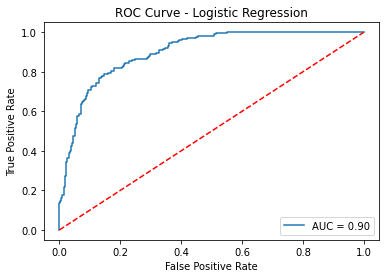

In [18]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

# predict probabilities with validation set
lr_probs = lr.predict_proba(X_val)
# extract false positive and true positive rate, AUC score
fpr, tpr, _ = roc_curve(y_val, lr_probs[:, 1])
auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label = f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.show()


Q6. What is the AUC obtained?<br>
Ans -

In [19]:
print(f'the AUC is {auc:>.2f}.')

the AUC is 0.90.


### Hyperparameters

"Model tuning" refers to model adjustments to better fit the data. This is separate from "fitting" or "training" the model. The fitting/training procedure is governed by the amount and quality of your training data, as the fitting algorithm is unique to each classifier (e.g. logistic regression or random forest). 

However, there are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit; too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

Build a logistic regression model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall. 


In [20]:
# initialize and train model
lr_1 = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear')
lr_1.fit(X_train, y_train)
lr_1_pred = lr_1.predict(X_val)

# display metrics
print(f'Accuracy: {accuracy(y_val, lr_1_pred)}')
print(f'Precision: {precision(y_val, lr_1_pred)}')
print(f'Recall: {recall(y_val, lr_1_pred)}')


Accuracy: 0.7495908346972177
Precision: 1.0
Recall: 0.1404494382022472


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall. 


In [21]:
# initialize and train model
lr_2 = LogisticRegression(C = 0.5, penalty = 'l1', solver = 'liblinear')
lr_2.fit(X_train, y_train)
lr_2_pred = lr_2.predict(X_val)

# display metrics
print(f'Accuracy: {accuracy(y_val, lr_2_pred)}')
print(f'Precision: {precision(y_val, lr_2_pred)}')
print(f'Recall: {recall(y_val, lr_2_pred)}')


Accuracy: 0.7594108019639935
Precision: 0.8444444444444444
Recall: 0.21348314606741572


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall. 


In [22]:
# initialize and train model
lr_3 = LogisticRegression(C = 0.1, penalty = 'l2')
lr_3.fit(X_train, y_train)
lr_3_pred = lr_3.predict(X_val)

# display metrics
print(f'Accuracy: {accuracy(y_val, lr_3_pred)}')
print(f'Precision: {precision(y_val, lr_3_pred)}')
print(f'Recall: {recall(y_val, lr_3_pred)}')


Accuracy: 0.7594108019639935
Precision: 0.9428571428571428
Recall: 0.1853932584269663


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall. 

In [23]:
# initialize and train model
lr_4 = LogisticRegression(C = 0.5, penalty = 'l2')
lr_4.fit(X_train, y_train)
lr_4_pred = lr_4.predict(X_val)

# display metrics
print(f'Accuracy: {accuracy(y_val, lr_4_pred)}')
print(f'Precision: {precision(y_val, lr_4_pred)}')
print(f'Recall: {recall(y_val, lr_4_pred)}')


Accuracy: 0.7594108019639935
Precision: 0.8297872340425532
Recall: 0.21910112359550563


Q7. Which of the above models is better? <br>
Ans- Of the above models, the best one is the one with the highest accuracy since that is the metric that is most suitable in this case (see Q5). We pick the third model (model with hyperparameter 'C' set to 0.1 and penalty set to 'l2', named `lr_3`) since it has the joint highest accuracy with the second and fourth model but also has a substantially higher precision and a similar recall.

### Test set

You have worked on the training and validation dataset so far, but testing data does not include the labels. Choose the best hyperparameter values from the four models as seen in the previous section. Use this logistic model to make predictions on test set. 


In [24]:
# Construct your final logistic regression using the best hyperparameters obtained above (C and penalty)
lr_final = LogisticRegression(C = 0.1, penalty = 'l2')
# fit the model to the entire training set
lr_final.fit(X, y)
# return the prediction as "y_pred"
y_pred = lr_final.predict(X_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

## Dataset 2
The dataset you will be using in the following parts is "Wine". 

There are two data files: "wine.csv" and "wine_Xtest.csv"<br/>
Both files have the following fields, except quality which is not available in "wine_Xtest.csv"

Features: <br>
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>

Target:<br>
12 - quality ('good' and 'bad')<br>

Training dataset, "wine.csv", contains 1000 rows and 12 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "wine_Xtest.csv", contains 300 rows and 11 columns. This is the test set which only contains the features.<br/>

Prediction task is to determine whether the quality is good. (If you transfrom the target as binary values, please make sure "good" is 1, "bad" is 0)

In [25]:
# Load your training data set and test data
df_train = pd.read_csv('wine.csv')
df_test = pd.read_csv('wine_Xtest.csv')
# convert labels to binary indicators
df_train['quality'] = df_train['quality'].map({'good': 1, 'bad': 0})
df_train


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.90,0.076,11.0,34,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.60,0.098,25.0,67,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.30,0.092,15.0,54,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.90,0.075,17.0,60,0.99800,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.90,0.076,11.0,34,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.7,0.60,0.06,2.00,0.079,19.0,41,0.99697,3.39,0.62,10.1,1
996,5.6,0.66,0.00,2.20,0.087,3.0,11,0.99378,3.71,0.63,12.8,1
997,5.6,0.66,0.00,2.20,0.087,3.0,11,0.99378,3.71,0.63,12.8,1
998,8.9,0.84,0.34,1.40,0.050,4.0,10,0.99554,3.12,0.48,9.1,1


In [26]:
# Split data into X and y
X = df_train.drop(columns = ['quality'])
y = df_train['quality']


### Skewness of data:
In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. <br>

If tail is on the right of data, it is right-skewed data. It is also called positively skewed data.<br>
Common transformations of this type of data include square root, cube root, and log.

If the tail is to the left of data, then it is called left-skewed data. It is also called negatively skewed data.<br>
Common transformations include square, cube and exponentiation.

Plot a histogram of X to understand the distributions of the continuous values.<br/>

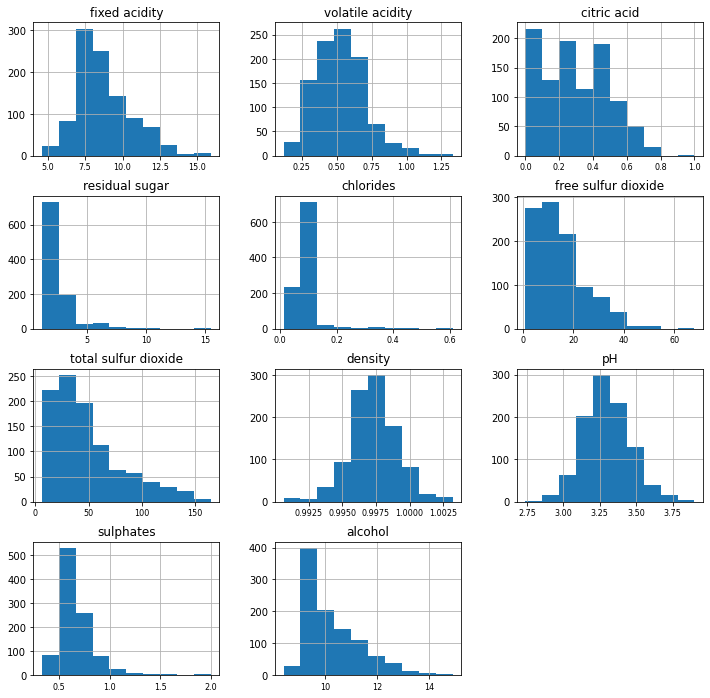

In [27]:
X.hist(xlabelsize = 8, figsize = (12, 12))
plt.show()


Q8. According to the above histogram, can you see any skewed features? Which features are skewed? Are they left-skewed or right-skewed? <br>
Ans - Yes, there are several features that are right-skewed: Citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, and alcohol.

Perform transformations on the skewed features so that the distribution of these features becomes closer to a normal distribution.

In [28]:
cols_skew = ['citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
for col in cols_skew:
    X[col] = X[col] ** 0.5
    
X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.000000,1.378405,0.275681,3.316625,5.830952,0.99780,3.51,0.56,3.065942
1,7.8,0.88,0.000000,1.612452,0.313050,5.000000,8.185353,0.99680,3.20,0.68,3.130495
2,7.8,0.76,0.200000,1.516575,0.303315,3.872983,7.348469,0.99700,3.26,0.65,3.130495
3,11.2,0.28,0.748331,1.378405,0.273861,4.123106,7.745967,0.99800,3.16,0.58,3.130495
4,7.4,0.70,0.000000,1.378405,0.275681,3.316625,5.830952,0.99780,3.51,0.56,3.065942
...,...,...,...,...,...,...,...,...,...,...,...
995,7.7,0.60,0.244949,1.414214,0.281069,4.358899,6.403124,0.99697,3.39,0.62,3.178050
996,5.6,0.66,0.000000,1.483240,0.294958,1.732051,3.316625,0.99378,3.71,0.63,3.577709
997,5.6,0.66,0.000000,1.483240,0.294958,1.732051,3.316625,0.99378,3.71,0.63,3.577709
998,8.9,0.84,0.583095,1.183216,0.223607,2.000000,3.162278,0.99554,3.12,0.48,3.016621


Plot the histogram of the transformed X to see if your transformations are successful

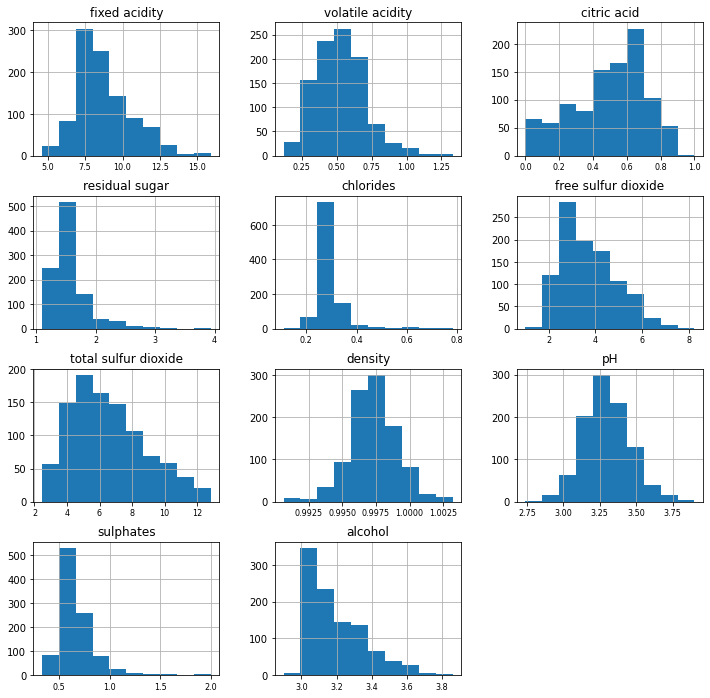

In [29]:
X.hist(xlabelsize = 8, figsize = (12, 12))
plt.show()


While these transformations don't necessarily make the distribution of every feature a normal distribution, they certainly move them **closer** to a normal distribtution, so we can consider the transformations successful.

Standardize the transformed X

In [30]:
# initialize scaler object
scaler = StandardScaler()
# columns we want to standardize
col_names = list(X.columns)
# fit and apply transformation
scaler = StandardScaler().fit(X[col_names].values)
X[col_names] = scaler.transform(X[col_names].values)

X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.723926,0.962173,-2.176274,-0.634109,-0.316652,-0.316709,-0.324682,0.253511,1.335919,-0.592623,-0.828188
1,-0.506024,1.970799,-2.176274,0.118339,0.308243,1.070167,0.710597,-0.309197,-0.627736,0.062692,-0.417880
2,-0.506024,1.298382,-1.293724,-0.189899,0.145458,0.141656,0.342602,-0.196655,-0.247674,-0.101137,-0.417880
3,1.346147,-1.391288,1.125926,-0.634109,-0.347082,0.347724,0.517390,0.366053,-0.881111,-0.483404,-0.417880
4,-0.723926,0.962173,-2.176274,-0.634109,-0.316652,-0.316709,-0.324682,0.253511,1.335919,-0.592623,-0.828188
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.560500,0.401825,-1.095375,-0.518986,-0.226545,0.541986,-0.073086,-0.213537,0.575794,-0.264966,-0.115617
996,-1.704488,0.738034,-2.176274,-0.297071,0.005701,-1.622186,-1.430285,-2.008576,2.602793,-0.210356,2.424666
997,-1.704488,0.738034,-2.176274,-0.297071,0.005701,-1.622186,-1.430285,-2.008576,2.602793,-0.210356,2.424666
998,0.093208,1.746660,0.396779,-1.261631,-1.187463,-1.401431,-1.498155,-1.018210,-1.134486,-1.029500,-1.141681


Splitting training data into training and validation set (the code has been provided)

In [31]:
X_train = X.iloc[:700,:]
y_train = y.iloc[:700]
X_val = X.iloc[700:,:]
y_val = y.iloc[700:]

# convert from series to numpy array for comparison with model output
y_val = np.array(y_val)


## Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [32]:
from sklearn.tree import DecisionTreeClassifier
# Fit the classifier on the training data
# Please set random_state=20
dt = DecisionTreeClassifier(random_state = 20)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=20)

In [33]:
# Make predictions on the training data
pred_train = dt.predict(X_train)
pred_train


array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,

Print accuracy, prediction and recall for the predictions made on the training data. 

In [34]:
print(f'Accuracy: {accuracy(y_train, pred_train)}')
print(f'Precision: {precision(y_train, pred_train)}')
print(f'Recall: {recall(y_train, pred_train)}')


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [35]:
# Make predictions on the validation data
pred_val = dt.predict(X_val)
pred_val


array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0], d

Print accuracy, prediction and recall for the predictions made on the validation data. 

In [36]:
print(f'Accuracy: {accuracy(y_val, pred_val)}')
print(f'Precision: {precision(y_val, pred_val)}')
print(f'Recall: {recall(y_val, pred_val)}')


Accuracy: 0.6133333333333333
Precision: 0.6242038216560509
Recall: 0.632258064516129


Plot ROC curve and obtain AUC for validation predictions

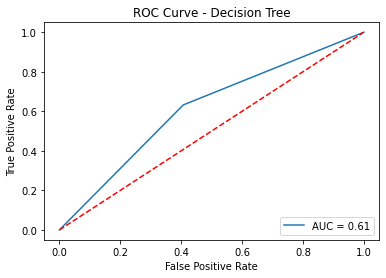

In [37]:
# Plot the ROC curve by giving appropriate names for title and axes.

# predict probabilities with validation set
dt_probs = dt.predict_proba(X_val)
# extract false positive and true positive rate, AUC score
fpr, tpr, _ = roc_curve(y_val, dt_probs[:, 1])
auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label = f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.show()


In [38]:
print(f'AUC is {auc:.2f}.')

AUC is 0.61.


Q9. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance.<br>

Ans - The above model performs flawlessly on the training set; however, this is due to the fact that it was used to train the model (hence "training" set). The decision tree has learned every single small detail of the training data, leading to **low bias and high variance** as a result of overfitting. This can be seen by the fact that it performs very poorly on the validation set.

## Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability. 


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [39]:
from sklearn.ensemble import RandomForestClassifier
# Fit the classifier on the training data
# Please set random_state=20
rf = RandomForestClassifier(random_state = 20)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=20)

In [40]:
# Make predictions on the training data
pred_train = rf.predict(X_train)
pred_train


array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,

Print accuracy, prediction and recall for the predictions made on the training data. 

In [41]:
print(f'Accuracy: {accuracy(y_train, pred_train)}')
print(f'Precision: {precision(y_train, pred_train)}')
print(f'Recall: {recall(y_train, pred_train)}')


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [42]:
# Make predictions on the validation data
pred_val = rf.predict(X_val)
pred_val


array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1], d

Print accuracy, prediction and recall for the predictions made on the validation data. 

In [43]:
print(f'Accuracy: {accuracy(y_val, pred_val)}')
print(f'Precision: {precision(y_val, pred_val)}')
print(f'Recall: {recall(y_val, pred_val)}')


Accuracy: 0.73
Precision: 0.7102272727272727
Recall: 0.8064516129032258


Plot ROC curve and obtain AUC for the validation predictions

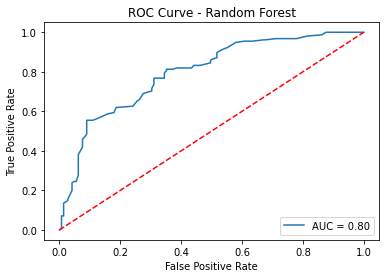

In [44]:
# Plot the ROC curve by giving appropriate names for title and axes.

# predict probabilities with validation set
rf_probs = rf.predict_proba(X_val)
# extract false positive and true positive rate, AUC score
fpr, tpr, _ = roc_curve(y_val, rf_probs[:, 1])
auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label = f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.show()


In [45]:
print(f'AUC is {auc:.2f}.')

AUC is 0.80.


Q10. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated. <br>

Ans - The Random Forest model performs similarly well on the training set; however, it performs much better on the validation set than the decision tree (as seen by the precision, recall, and accuracy scores). This is because the Random Forest has **more bias and less variance** than a single decision tree by construction, making it less prone to overfitting.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data. This is separate from "fitting" or "training" the model. The fitting/training procedure is governed by the amount and quality of your training data, as the fitting algorithm is unique to each classifier (e.g. logistic regression or random forest). 

However, there are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters. 

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn's doc to understand what the parameters depict

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 30, 40, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [3, 4, 5, 6, 7, 10,15, 20],
    'n_estimators': [5, 10, 15, 20, 25, 50, 75, 100]
}


In [48]:
rf = RandomForestClassifier(random_state = 20)


In [49]:
# We use f1_score in this question
grid_search = GridSearchCV(estimator = rf, scoring = 'f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [50]:
# Fit the training data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 10240 candidates, totalling 30720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 1194 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2084 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3138 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4352 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 5730 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 7268 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 8970 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 10832 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 12858 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 15044 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 17394 tasks    

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=20), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 6, 7, 10, 15, 20],
                         'n_estimators': [5, 10, 15, 20, 25, 50, 75, 100]},
             scoring='f1', verbose=2)

In [51]:
# Print the best parameters
grid_search.best_params_


{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 9,
 'min_samples_split': 3,
 'n_estimators': 5}

In [52]:
# Print the best score
grid_search.best_score_


0.7117718693509745

In [53]:
# Using the best model, do the following:
# Make predictions on the training set and display accuracy, precision and recall.
best = grid_search.best_estimator_
best.fit(X_train, y_train) 
pred_best_train = best.predict(X_train)

print('Training set metrics:')
print(f'Accuracy: {accuracy(y_train, pred_best_train)}')
print(f'Precision: {precision(y_train, pred_best_train)}')
print(f'Recall: {recall(y_train, pred_best_train)}')

# Make predictions on the validation set and display accuracy, precision and recall.
pred_best_val = best.predict(X_val)
print('Validation set metrics:')
print(f'Accuracy: {accuracy(y_val, pred_best_val)}')
print(f'Precision: {precision(y_val, pred_best_val)}')
print(f'Recall: {recall(y_val, pred_best_val)}')


Training set metrics:
Accuracy: 0.8142857142857143
Precision: 0.7900552486187845
Recall: 0.8411764705882353
Validation set metrics:
Accuracy: 0.75
Precision: 0.75
Recall: 0.7741935483870968


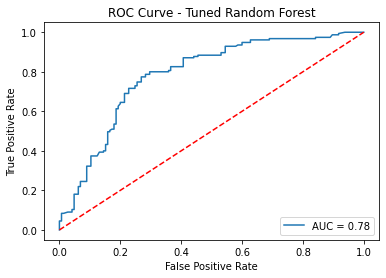

In [54]:
# Using the best model, plot the ROC curve by giving appropriate names for title and axes.

# predict probabilities with validation set
best_probs = best.predict_proba(X_val)
# extract false positive and true positive rate, AUC score
fpr, tpr, _ = roc_curve(y_val, best_probs[:, 1])
auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label = f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Random Forest')
plt.show()


In [55]:
print(f'AUC is {auc:.2f}.')

AUC is 0.78.


### Test
Choose the best hyperparameter values from the previous section. Use this random forest model to make predictions on test set. 

In [56]:
# replicating data preprocessing on test set
df_test = pd.read_csv('wine_Xtest.csv')
cols_skew = ['citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
for col in cols_skew:
    df_test[col] = df_test[col] ** 0.5
    
col_names = list(X.columns)
# apply same transformation that we did on training data
df_test[col_names] = scaler.transform(df_test[col_names].values)

# Construct your final random forest using the best hyperparameters obtained above
rf_best = RandomForestClassifier(max_depth = 5, max_features = 'sqrt',
                                  min_samples_leaf = 9, min_samples_split = 3, n_estimators = 5)
rf_best.fit(X, y)

# return the prediction as "y_pred2"
y_pred2 = rf_best.predict(df_test)
y_pred2


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1], d